In this lab we will characterize a system with the tools discussed so far in this course. We will characterize Setup #3, a Google cloud machine setup with three VM instances.

In [22]:
# Press Shift+Enter to run this cell
crsid='dtz22' #your crsid
machA_ip = '35.199.70.158'
machB_ip = '35.198.49.127'
machC_ip = '35.198.60.103'
%matplotlib inline
%run ./useful.py
%run ./useful1.py


First run: `source ./setup.sh <crsid>` to setup your directory for storing the experiment data and results.

**Experiment 1**

Our first step is to check the connectivity of the setup, to test that all three machines are connected properly and can communicate, with the ping tool. We ping each machine 20 times from each other machine with interval 0.2 seconds, the minimum Google cloud allows, and plot the CDFs of the RTTs of the six pings.

In [15]:
ssh = ssh_connect(machA_ip)
for i in range(10):
    with open('./'+crsid+'/pings/exp1_ab_'+str(i),'w+') as f:
        output = ssh_cmd('ping ' + machB_ip + ' -c 20 -i 0.2 | grep -e "ttl"',ssh)
        f.write(output)
    with open('./'+crsid+'/pings/exp1_ac_'+str(i),'w+') as f:
        output = ssh_cmd('ping ' + machC_ip + ' -c 20 -i 0.2 | grep -e "ttl"',ssh)
        f.write(output)
ssh.close()

In [25]:
ssh = ssh_connect(machB_ip)
for i in range(10):
    with open('./'+crsid+'/pings/exp1_ba_'+str(i),'w+') as f:
        output = ssh_cmd('ping ' + machA_ip + ' -c 20 -i 0.2 | grep -e "ttl"',ssh)
        f.write(output)
    with open('./'+crsid+'/pings/exp1_bc_'+str(i),'w+') as f:
        output = ssh_cmd('ping ' + machC_ip + ' -c 20 -i 0.2 | grep -e "ttl"',ssh)
        f.write(output)
ssh.close()

In [26]:
ssh = ssh_connect(machC_ip)
for i in range(10):
    with open('./'+crsid+'/pings/exp1_ca_'+str(i),'w+') as f:
        output = ssh_cmd('ping ' + machA_ip + ' -c 20 -i 0.2 | grep -e "ttl"',ssh)
        f.write(output)
    with open('./'+crsid+'/pings/exp1_cb_'+str(i),'w+') as f:
        output = ssh_cmd('ping ' + machB_ip + ' -c 20 -i 0.2 | grep -e "ttl"',ssh)
        f.write(output)
ssh.close()

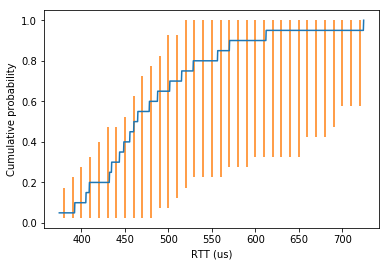

In [24]:
graph1('exp1_ab', crsid, 10.0, 20)

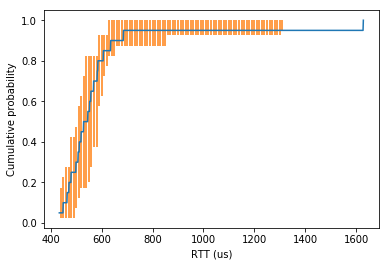

In [28]:
graph1('exp1_ac', crsid, 10.0, 20)

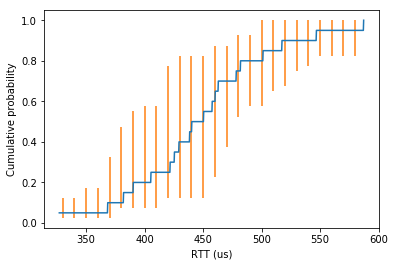

In [29]:
graph1('exp1_ba', crsid, 10.0, 20)

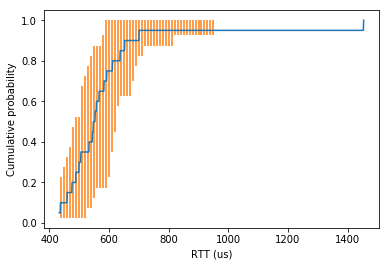

In [30]:
graph1('exp1_bc', crsid, 10.0, 20)

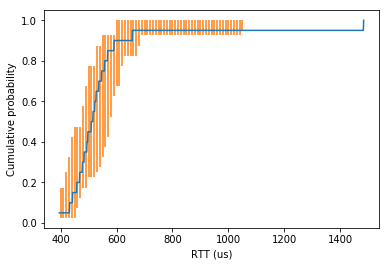

In [31]:
graph1('exp1_ca', crsid, 10.0, 20)

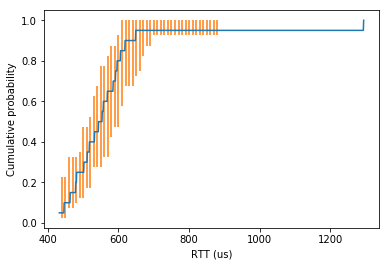

Socket exception: Connection reset by peer (54)
Socket exception: Connection reset by peer (54)


In [32]:
graph1('exp1_cb', crsid, 10.0, 20)

*Insert some commentary here about the connections, noting any specific abnormalities.*

**Experiment 2**

Next we investigate noted abnormality and try to understand using `traceroute`.